In [4]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.optimizers import Adam
import keras,os
import numpy as np
import matplotlib.pyplot as plt

In [5]:
h = 300
w = 150
    
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=( h, w,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# model.add(Conv2D(64, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.2))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(2,activation='softmax'))

# model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])


# opt = Adam(lr=0.005)
model.compile(optimizer="adam", loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])


In [6]:
batch_size = 10

train_datagen = ImageDataGenerator(horizontal_flip=True,brightness_range=[0.3,1.0],width_shift_range=[-10,10],height_shift_range=[0,20])
test_datagen = ImageDataGenerator(horizontal_flip=True,brightness_range=[0.3,1.0],width_shift_range=[-10,10],height_shift_range=[0,20])


train_generator = train_datagen.flow_from_directory('croped/train', target_size=(h, w),batch_size=batch_size,color_mode="grayscale") 
validation_generator = test_datagen.flow_from_directory('croped/test',target_size=(h, w),batch_size=batch_size,color_mode="grayscale")

print(train_generator.samples)
print(validation_generator.samples)
print(train_generator.class_indices)

Found 1182 images belonging to 2 classes.
Found 389 images belonging to 2 classes.
1182
389
{'formal': 0, 'informal': 1}


In [7]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch=train_generator.samples // batch_size,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=validation_generator.samples // batch_size)


model.save('models/version7.h5')  # always save your weights after training or during trainin


/home/uchiha/ObjectDetectionEnv/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
118/118 [==============================] - 38s 318ms/step - loss: 24.5356 - accuracy: 0.5209 - val_loss: 0.6804 - val_accuracy: 0.5658
Epoch 2/50
118/118 [==============================] - 37s 312ms/step - loss: 0.6625 - accuracy: 0.5954 - val_loss: 0.6409 - val_accuracy: 0.6053
Epoch 3/50
118/118 [==============================] - 37s 313ms/step - loss: 0.6444 - accuracy: 0.6351 - val_loss: 0.6515 - val_accuracy: 0.5763
Epoch 4/50
118/118 [==============================] - 37s 308ms/step - loss: 0.6331 - accuracy: 0.6537 - val_loss: 0.6475 - val_accuracy: 0.5974
Epoch 5/50
118/118 [==============================] - 38s 322ms/step - loss: 0.5951 - accuracy: 0.6839 - val_loss: 0.6420 - val_accuracy: 0.5974
Epoch 6/50
118/118 [==============================] - 38s 317ms/step - loss: 0.5989 - accuracy: 0.6589 - val_loss: 0.6594 - val_accuracy: 0.5579
Epoch 7/50
118/118 [==============================] - 37s 311ms/step - loss: 0.5701 - accuracy: 0.7182 - val_loss: 0.6431 - val_a

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


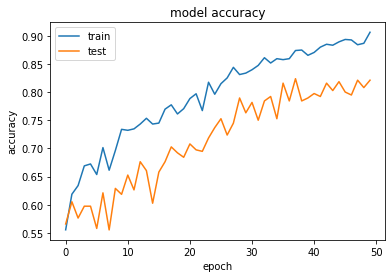

In [10]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

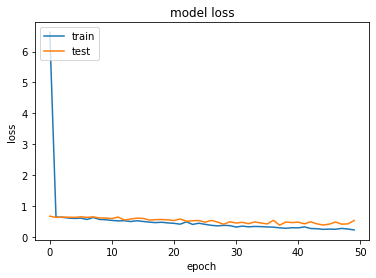

In [11]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()